In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Function to interpolate
def f(x):
    return 1 / (1 + (10 * x) ** 2)

# Monomial Expansion Method
def monomial_expansion(x_values, y_values, eval_points):
    n = len(x_values)
    A = np.vander(x_values, increasing=True)
    coeffs = np.linalg.solve(A, y_values)
    return np.polyval(coeffs[::-1], eval_points)

# Lagrange Polynomials Method
def lagrange_polynomial(x_values, y_values, eval_points):
    def L(k, x):
        lk = np.ones_like(x)
        for i in range(len(x_values)):
            if i != k:
                lk *= (x - x_values[i]) / (x_values[k] - x_values[i])
        return lk

    P = np.zeros_like(eval_points)
    for k in range(len(x_values)):
        P += y_values[k] * L(k, eval_points)
    return P

# Newton Divided Differences Method
def newton_divided_differences(x_values, y_values, eval_points):
    n = len(x_values)
    coeffs = np.copy(y_values)
    for j in range(1, n):
        for i in range(n - 1, j - 1, -1):
            coeffs[i] = (coeffs[i] - coeffs[i - 1]) / (x_values[i] - x_values[i - j])
    
    def newton_polynomial(x):
        result = coeffs[-1]
        for i in range(n - 2, -1, -1):
            result = result * (x - x_values[i]) + coeffs[i]
        return result
    
    return newton_polynomial(eval_points)
x_eval = np.linspace(-1, 1, 1000)
f_eval = f(x_eval)

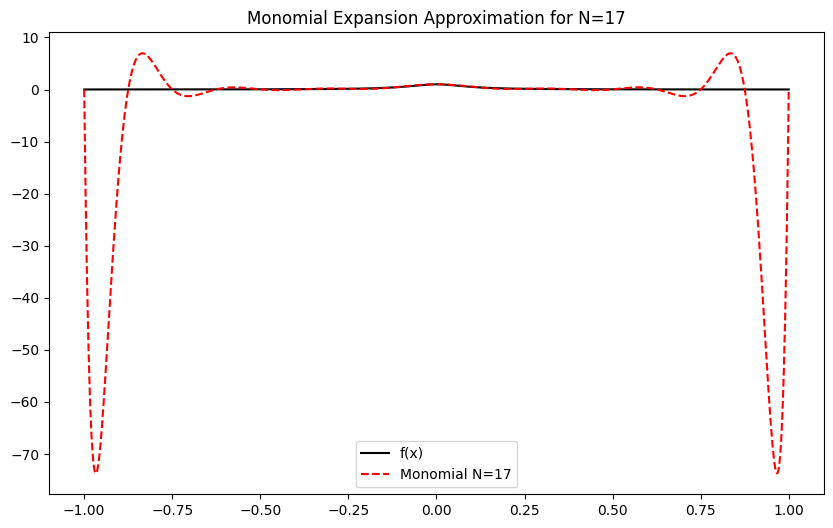

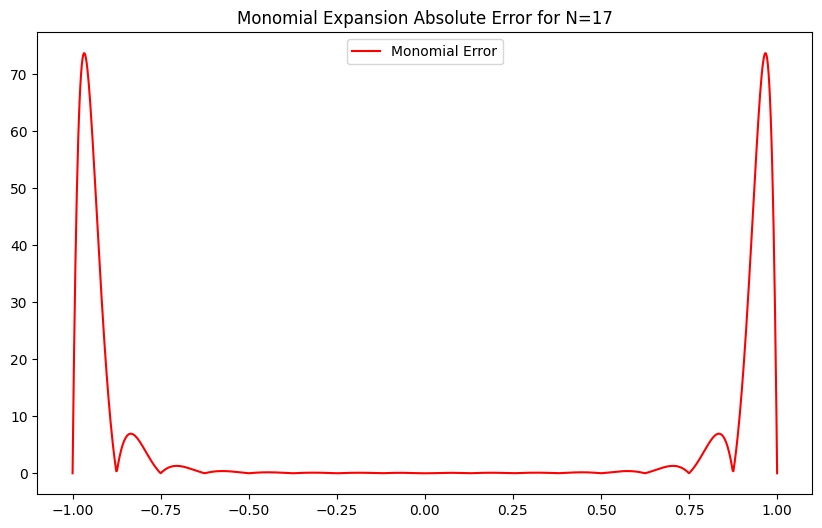

In [21]:
# Let's plot for Monomial Expansion with N=9

N = 17
x_nodes = np.linspace(-1, 1, N)
y_nodes = f(x_nodes)

# Monomial Expansion
monomial_approx = monomial_expansion(x_nodes, y_nodes, x_eval)
monomial_error = np.abs(monomial_approx - f_eval)

# Plot the approximation
plt.figure(figsize=(10, 6))
plt.plot(x_eval, f_eval, label="f(x)", color="black")
plt.plot(x_eval, monomial_approx, label=f"Monomial N={N}", linestyle="--", color='red')
plt.title(f"Monomial Expansion Approximation for N={N}")
plt.legend()
plt.show()

# Plot the absolute error
plt.figure(figsize=(10, 6))
plt.plot(x_eval, monomial_error, label="Monomial Error", color='red')
plt.title(f"Monomial Expansion Absolute Error for N={N}")
plt.legend()
plt.show()

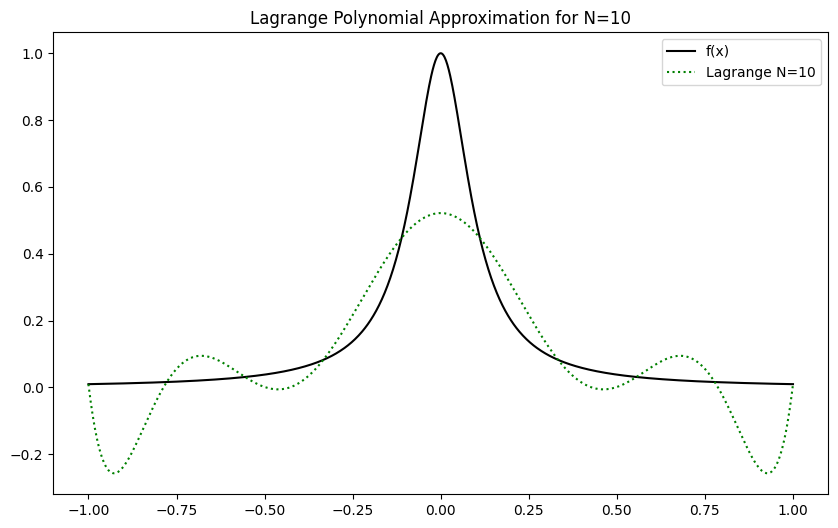

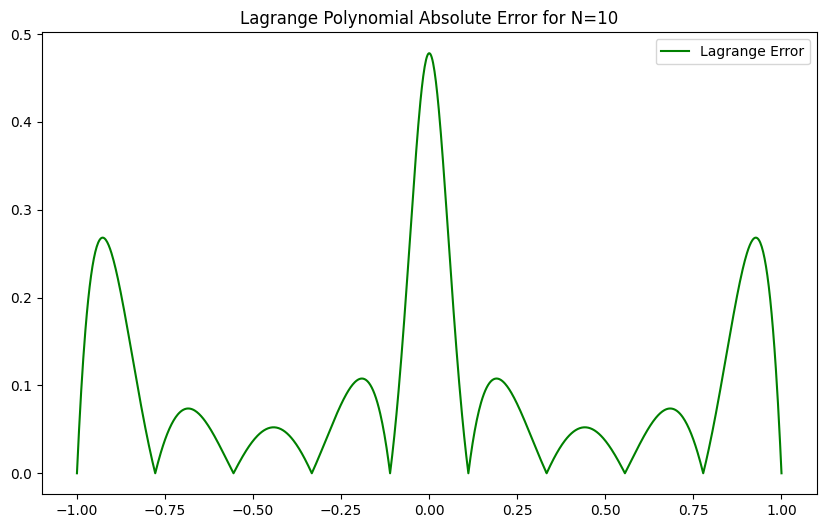

In [22]:
# Let's plot for Lagrange Polynomials with N=10

N = 10
x_nodes = np.linspace(-1, 1, N)
y_nodes = f(x_nodes)

# Lagrange Polynomials
lagrange_approx = lagrange_polynomial(x_nodes, y_nodes, x_eval)
lagrange_error = np.abs(lagrange_approx - f_eval)

# Plot the approximation
plt.figure(figsize=(10, 6))
plt.plot(x_eval, f_eval, label="f(x)", color="black")
plt.plot(x_eval, lagrange_approx, label=f"Lagrange N={N}", linestyle=":", color='green')
plt.title(f"Lagrange Polynomial Approximation for N={N}")
plt.legend()
plt.show()

# Plot the absolute error
plt.figure(figsize=(10, 6))
plt.plot(x_eval, lagrange_error, label="Lagrange Error", color='green')
plt.title(f"Lagrange Polynomial Absolute Error for N={N}")
plt.legend()
plt.show()


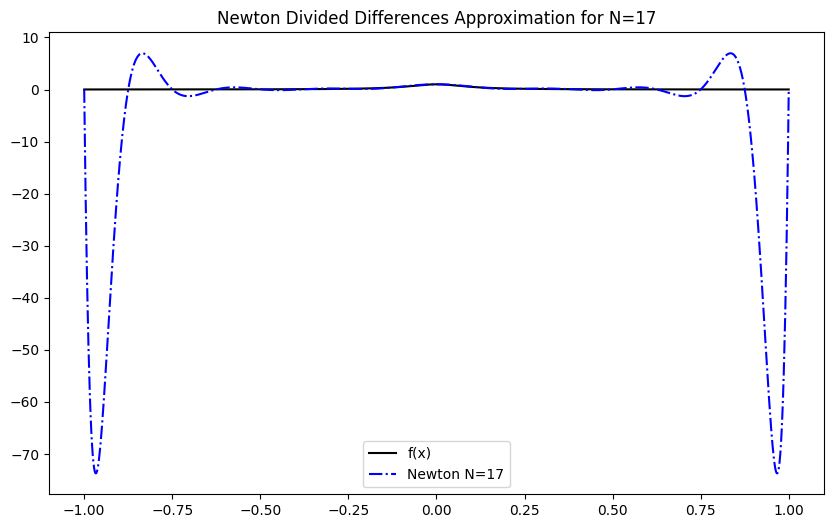

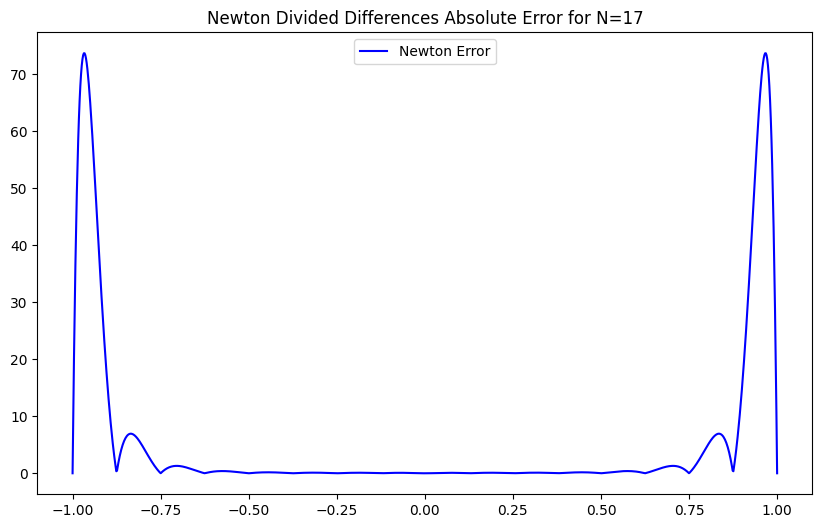

In [23]:
# Let's plot for Newton Divided Differences with N=10

N = 17
x_nodes = np.linspace(-1, 1, N)
y_nodes = f(x_nodes)

# Newton Divided Differences
newton_approx = newton_divided_differences(x_nodes, y_nodes, x_eval)
newton_error = np.abs(newton_approx - f_eval)

# Plot the approximation
plt.figure(figsize=(10, 6))
plt.plot(x_eval, f_eval, label="f(x)", color="black")
plt.plot(x_eval, newton_approx, label=f"Newton N={N}", linestyle="-.", color='blue')
plt.title(f"Newton Divided Differences Approximation for N={N}")
plt.legend()
plt.show()

# Plot the absolute error
plt.figure(figsize=(10, 6))
plt.plot(x_eval, newton_error, label="Newton Error", color='blue')
plt.title(f"Newton Divided Differences Absolute Error for N={N}")
plt.legend()
plt.show()


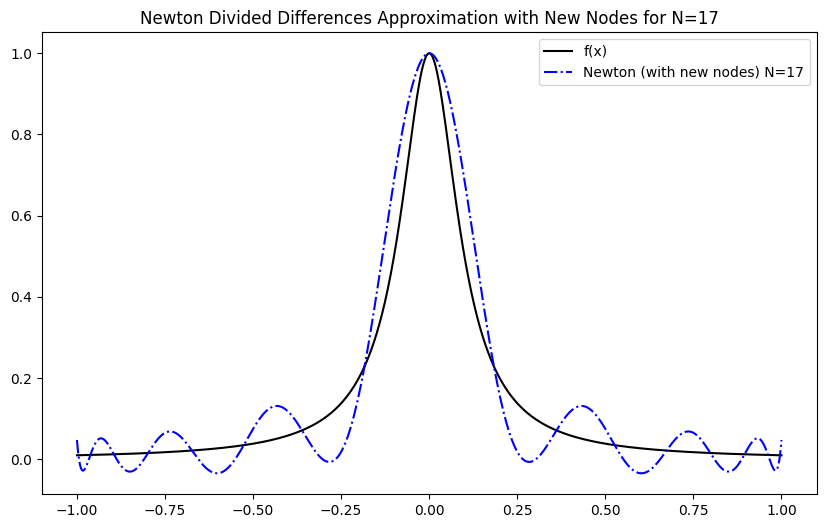

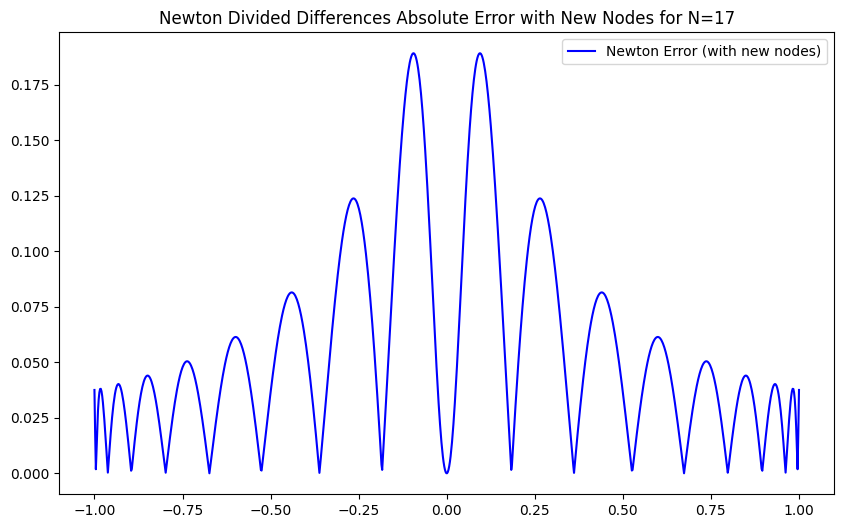

In [24]:
# Let's repeat the experiment for Newton Divided Differences with new nodes for N=10

N = 17
# New interpolation nodes based on the given formula
x_nodes_new = np.cos((2 * np.arange(1, N+1) - 1) * np.pi / (2 * N))
y_nodes_new = f(x_nodes_new)

# Newton Divided Differences
newton_approx_new = newton_divided_differences(x_nodes_new, y_nodes_new, x_eval)
newton_error_new = np.abs(newton_approx_new - f_eval)

# Plot the approximation with new nodes
plt.figure(figsize=(10, 6))
plt.plot(x_eval, f_eval, label="f(x)", color="black")
plt.plot(x_eval, newton_approx_new, label=f"Newton (with new nodes) N={N}", linestyle="-.", color='blue')
plt.title(f"Newton Divided Differences Approximation with New Nodes for N={N}")
plt.legend()
plt.show()

# Plot the absolute error with new nodes
plt.figure(figsize=(10, 6))
plt.plot(x_eval, newton_error_new, label="Newton Error (with new nodes)", color='blue')
plt.title(f"Newton Divided Differences Absolute Error with New Nodes for N={N}")
plt.legend()
plt.show()


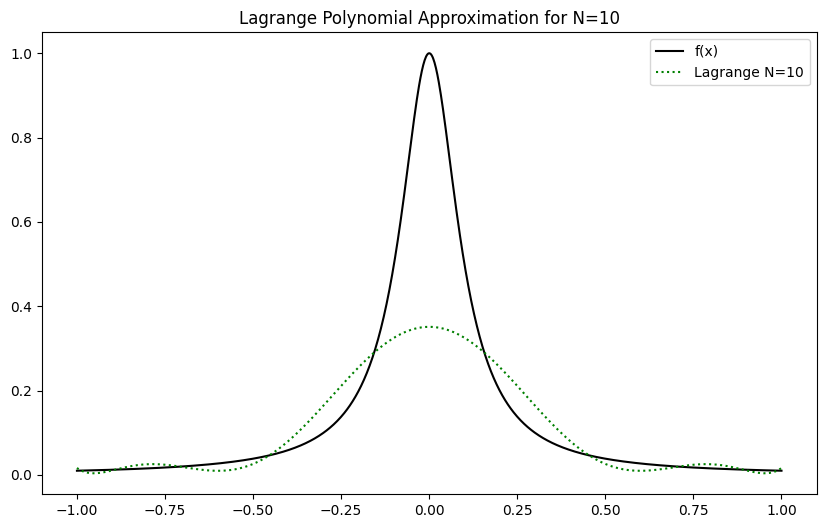

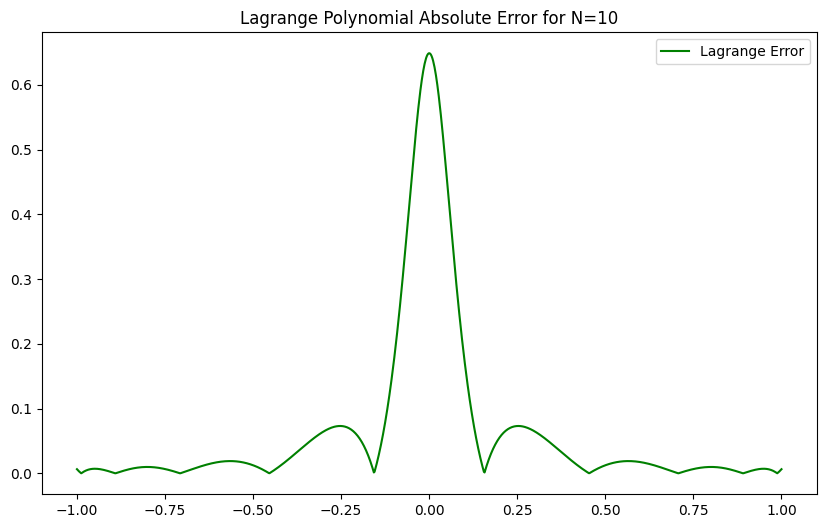

In [25]:
# Let's plot for Lagrange Polynomials with N=10

N = 10
# New interpolation nodes based on the given formula
x_nodes_new = np.cos((2 * np.arange(1, N+1) - 1) * np.pi / (2 * N))
y_nodes_new = f(x_nodes_new)

# Lagrange Polynomials
lagrange_approx_new = lagrange_polynomial(x_nodes_new, y_nodes_new, x_eval)
lagrange_error_new = np.abs(lagrange_approx_new - f_eval)

# Plot the approximation
plt.figure(figsize=(10, 6))
plt.plot(x_eval, f_eval, label="f(x)", color="black")
plt.plot(x_eval, lagrange_approx_new, label=f"Lagrange N={N}", linestyle=":", color='green')
plt.title(f"Lagrange Polynomial Approximation for N={N}")
plt.legend()
plt.show()

# Plot the absolute error
plt.figure(figsize=(10, 6))
plt.plot(x_eval, lagrange_error_new, label="Lagrange Error", color='green')
plt.title(f"Lagrange Polynomial Absolute Error for N={N}")
plt.legend()
plt.show()